In [8]:
import pandas as pd

# Путь к папке с результатами
RESULTS_DIR = "results/"

# Список названий алгоритмов (префиксов файлов)
algorithms = [
    "StandardQuickSort",
    "StandardMergeSort",
    "StringQuickSort",
    "StringMergeSort",
    "BasicMsdRadixSort",
    "BoostedMsdRadixSort"
]

# Собираем все прогоны в один DataFrame
all_runs = []

for algo in algorithms:
    for run in range(1, 6):
        # Формируем имя файла
        filename = RESULTS_DIR + f"{algo}.txt{run}"
        # Читаем файл
        df = pd.read_csv(
            filename,
            sep=" ",
            names=["mode", "size", "duration", "comparisons"]
        )
        # Добавляем колонки с названием алгоритма и номером прогона
        df["algorithm"] = algo
        df["run"] = run
        all_runs.append(df)

df_all = pd.concat(all_runs, ignore_index=True)

# Группируем и считаем среднее по времени и количеству сравнений
df_summary = (
    df_all
    .groupby(["algorithm", "mode", "size"], as_index=False)
    .agg(
        avg_duration=("duration", "mean"),
        avg_comparisons=("comparisons", "mean")
    )
)

df_summary


,algorithm,mode,size,avg_duration,avg_comparisons
0,BasicMsdRadixSort,ALMOST_SORTED,100,112.8,243.0
1,BasicMsdRadixSort,ALMOST_SORTED,200,207.4,487.0
2,BasicMsdRadixSort,ALMOST_SORTED,300,326.0,739.0
3,BasicMsdRadixSort,ALMOST_SORTED,400,413.2,995.0
4,BasicMsdRadixSort,ALMOST_SORTED,500,500.6,1234.0
...,...,...,...,...,...
715,StringQuickSort,REVERSED,2600,1012.6,57945.2
716,StringQuickSort,REVERSED,2700,1059.2,59747.4
717,StringQuickSort,REVERSED,2800,1078.2,62348.4
718,StringQuickSort,REVERSED,2900,1134.6,66515.0


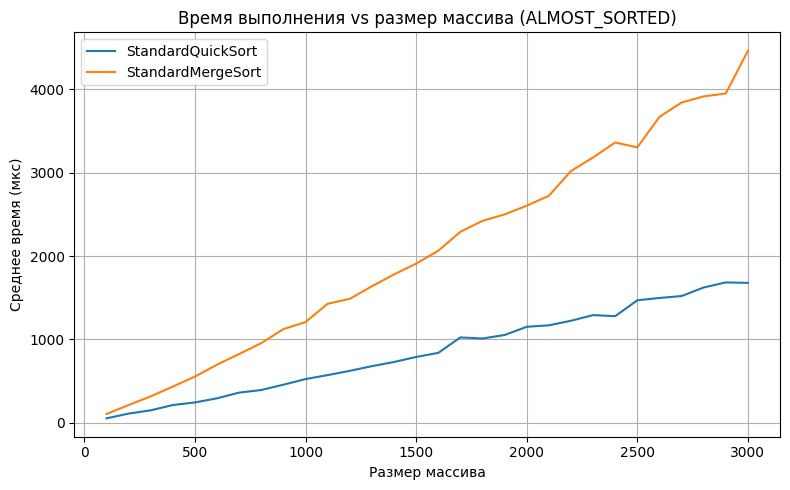

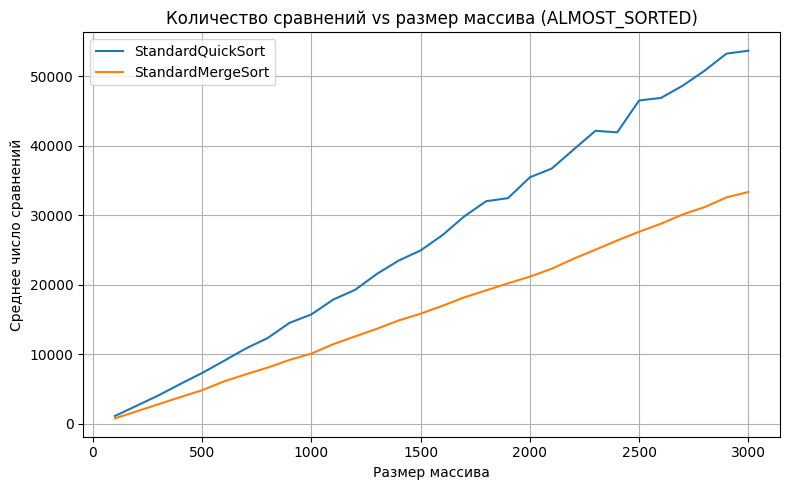

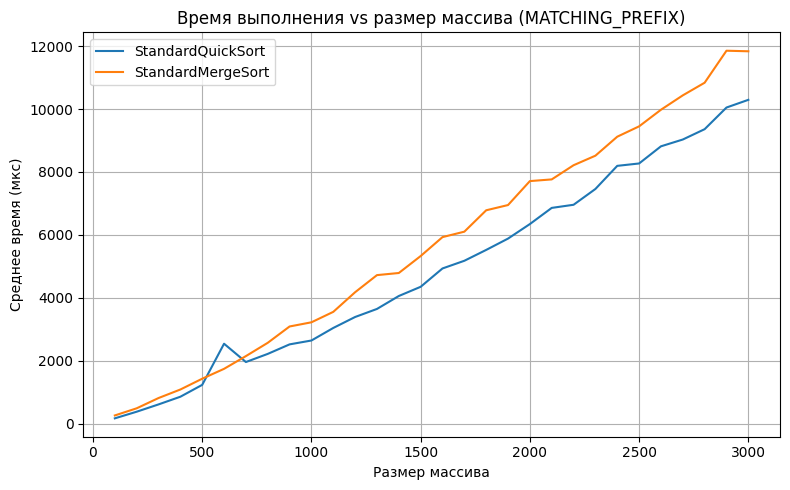

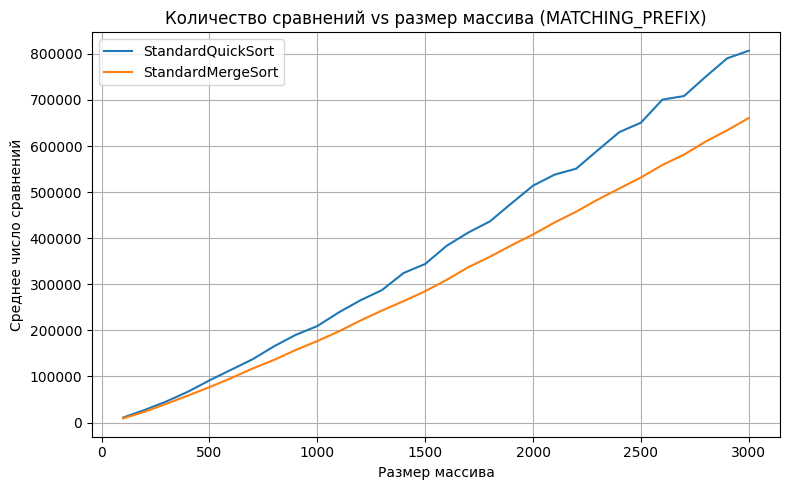

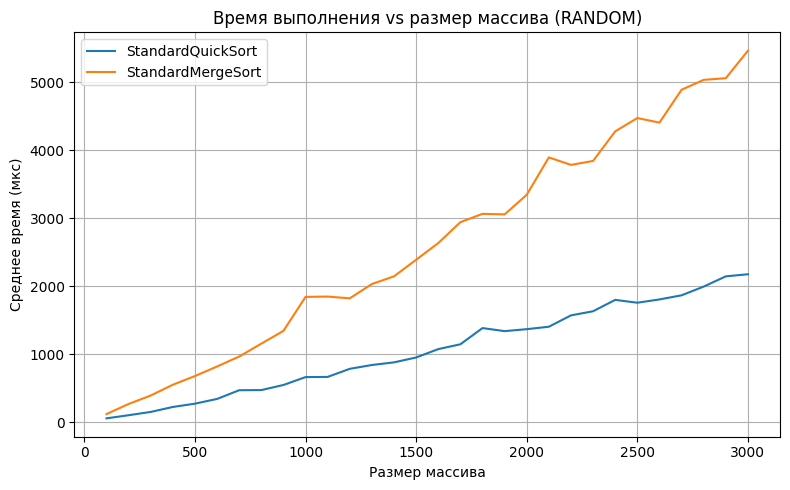

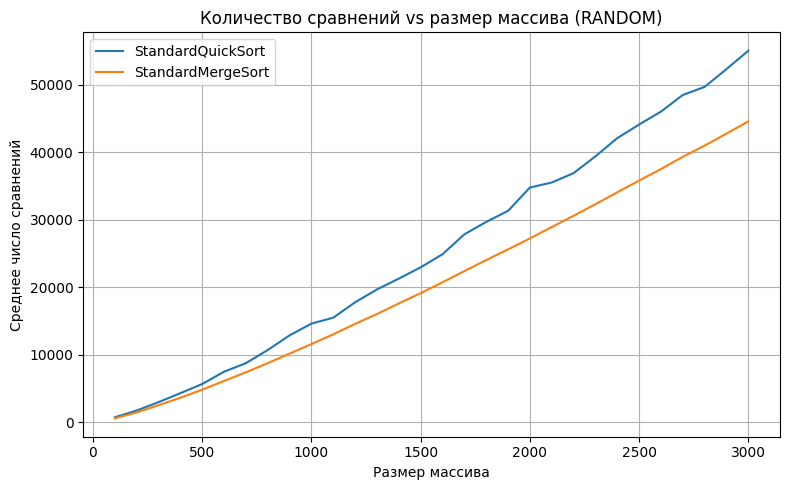

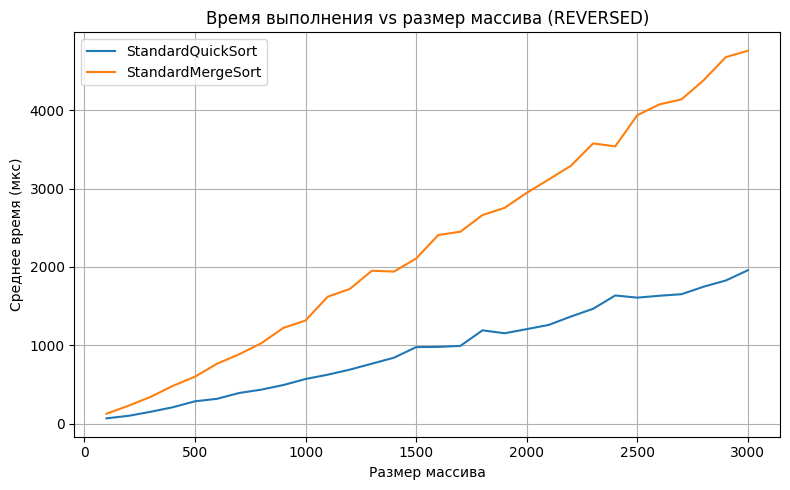

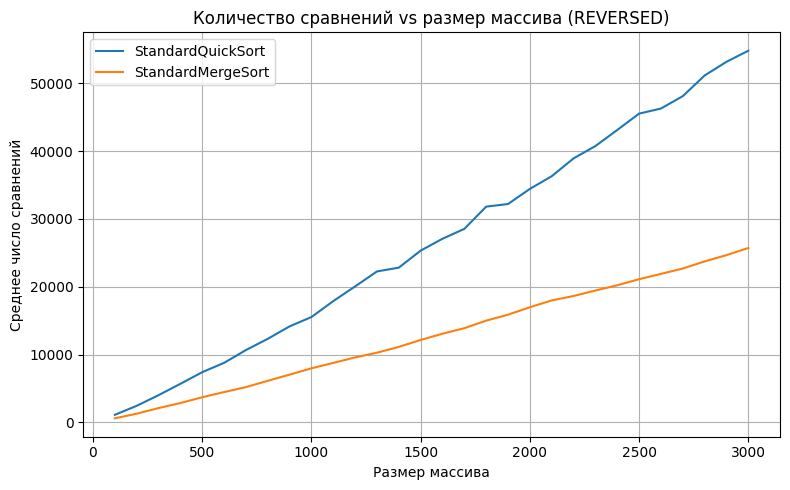

In [9]:
import matplotlib.pyplot as plt

modes = df_summary['mode'].unique()
algorithms = ["StandardQuickSort", "StandardMergeSort"]

for mode in modes:
    df_mode = df_summary[df_summary['mode'] == mode]

    # 1) Время vs размер массива
    plt.figure(figsize=(8, 5))
    for algo in algorithms:
        df_algo = df_mode[df_mode['algorithm'] == algo]
        plt.plot(df_algo['size'], df_algo['avg_duration'], label=algo)
    plt.title(f"Время выполнения vs размер массива ({mode})")
    plt.xlabel("Размер массива")
    plt.ylabel("Среднее время (мкс)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2) Сравнения vs размер массива
    plt.figure(figsize=(8, 5))
    for algo in algorithms:
        df_algo = df_mode[df_mode['algorithm'] == algo]
        plt.plot(df_algo['size'], df_algo['avg_comparisons'], label=algo)
    plt.title(f"Количество сравнений vs размер массива ({mode})")
    plt.xlabel("Размер массива")
    plt.ylabel("Среднее число сравнений")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


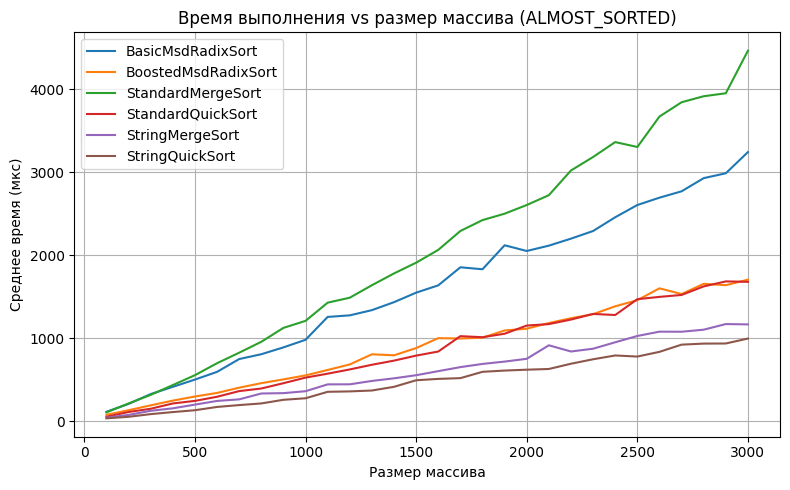

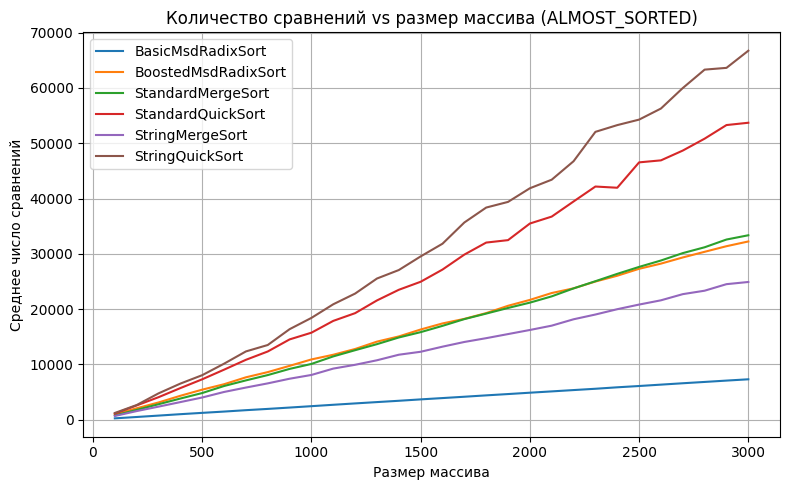

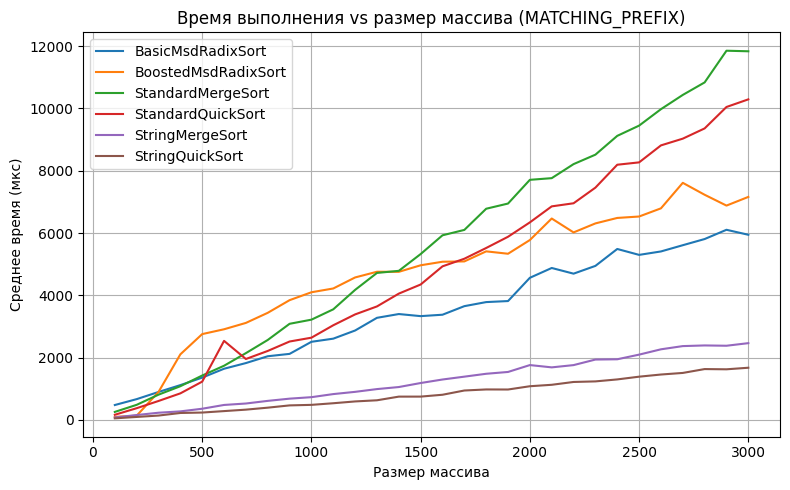

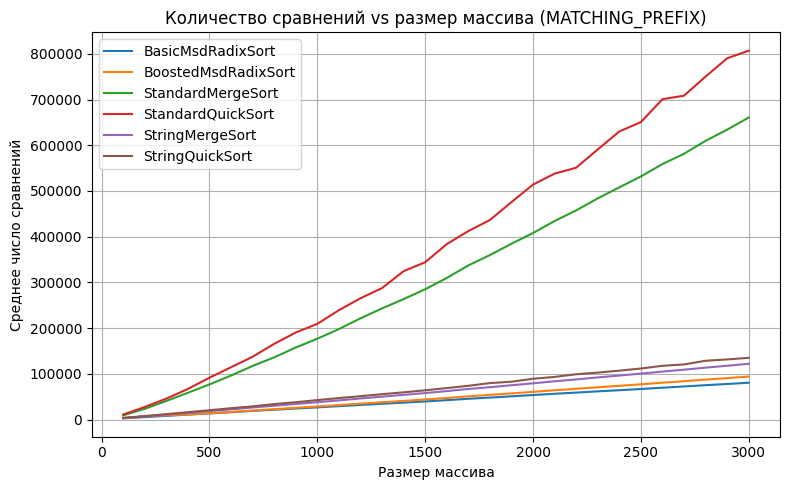

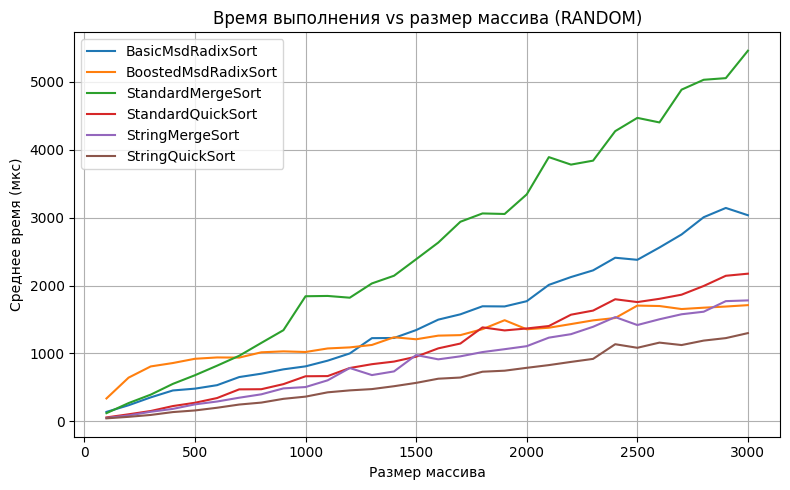

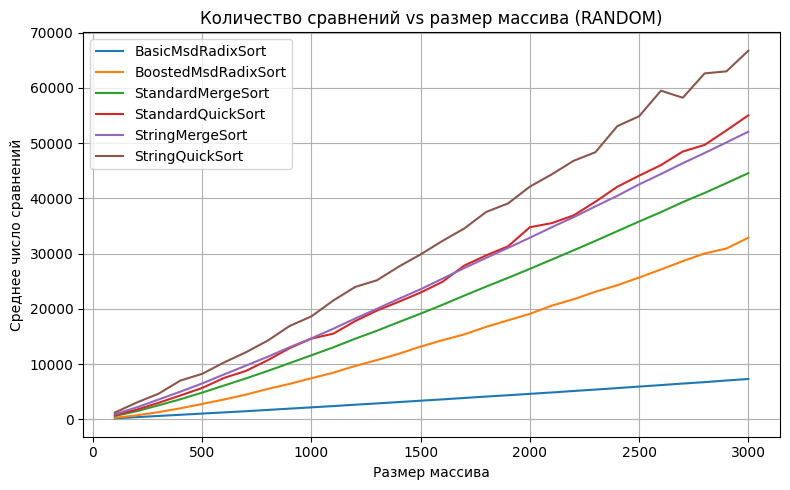

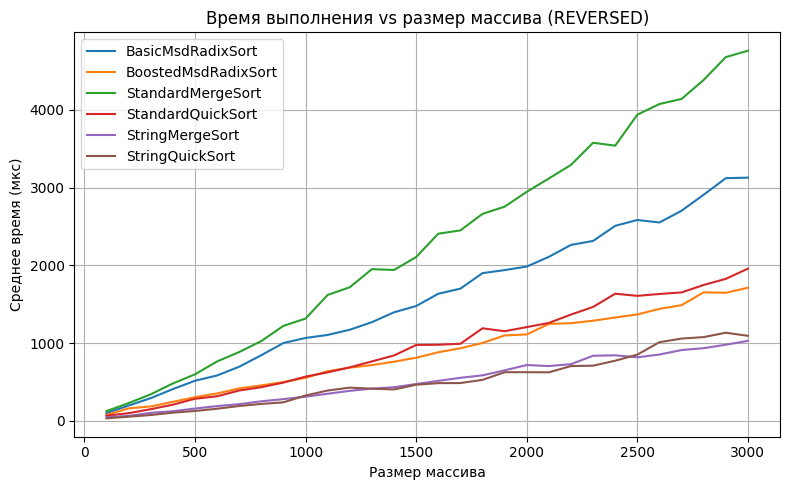

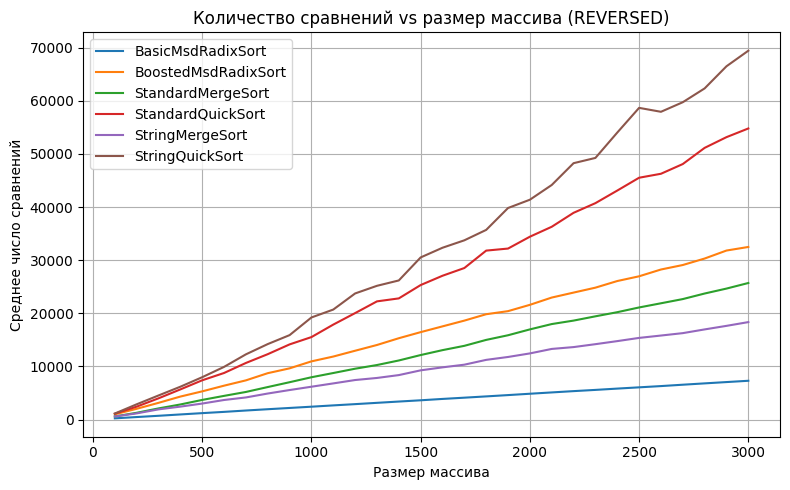

In [10]:
import matplotlib.pyplot as plt

modes = df_summary['mode'].unique()
algorithms = df_summary['algorithm'].unique()

for mode in modes:
    df_mode = df_summary[df_summary['mode'] == mode]

    # 1) Время vs размер массива
    plt.figure(figsize=(8, 5))
    for algo in algorithms:
        df_algo = df_mode[df_mode['algorithm'] == algo]
        plt.plot(df_algo['size'], df_algo['avg_duration'], label=algo)
    plt.title(f"Время выполнения vs размер массива ({mode})")
    plt.xlabel("Размер массива")
    plt.ylabel("Среднее время (мкс)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2) Сравнения vs размер массива
    plt.figure(figsize=(8, 5))
    for algo in algorithms:
        df_algo = df_mode[df_mode['algorithm'] == algo]
        plt.plot(df_algo['size'], df_algo['avg_comparisons'], label=algo)
    plt.title(f"Количество сравнений vs размер массива ({mode})")
    plt.xlabel("Размер массива")
    plt.ylabel("Среднее число сравнений")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
